In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_number
from matplotlib.pyplot import figure
%matplotlib inline
from datetime import datetime, timedelta

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#warnings.filterwarnings("ignore")

In [3]:
data_root_path = "./data"
seattle_dir_name = "airbnb-seattle"
boston_dir_name = "airbnb-boston"

In [4]:
seattle_data_path = os.path.join(data_root_path, seattle_dir_name)
boston_data_path = os.path.join(data_root_path, boston_dir_name)

In [5]:
# def dataWrangle1 (df):
#     retframe = df.copy()
#     retframe["id"] = pd.to_numeric(retframe['id'], errors='coerce')
#     retframe = retframe.dropna(subset=['id'])
#     retframe["id"] = retframe["id"].astype("int64")
#     retframe.drop_duplicates(subset=['id'], inplace=True)
#     retframe['last_scraped'] = pd.to_datetime(retframe['last_scraped'], errors='coerce')
#     retframe = retframe.dropna(subset=['last_scraped'])
#     return retframe

### New Start

In [6]:
def dataWrangle1 (df):
    retframe = df.copy()
    retframe["id"] = pd.to_numeric(retframe['id'], errors='coerce')
    retframe = retframe.dropna(subset=['id'])
    retframe["id"] = retframe["id"].astype("int64")
    retframe.drop_duplicates(subset=['id'], inplace=True)
    retframe['last_scraped'] = pd.to_datetime(retframe['last_scraped'], errors='coerce')
    retframe = retframe.dropna(subset=['last_scraped'])
    return retframe

In [7]:
df_listing_boston = pd.read_csv(os.path.join(boston_data_path, "total_listings.csv"))
df_listing_seattle = pd.read_csv(os.path.join(seattle_data_path, "total_listings.csv"))

/tmp/ipykernel_20806/1310795763.py:1: DtypeWarning: Columns (0,2,22,41,45,46,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listing_boston = pd.read_csv(os.path.join(boston_data_path, "total_listings.csv"))
/tmp/ipykernel_20806/1310795763.py:2: DtypeWarning: Columns (2,22,41,45,46,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listing_seattle = pd.read_csv(os.path.join(seattle_data_path, "total_listings.csv"))


In [8]:
df_listing_seattle["location"] = "seattle"
df_listing_boston["location"] = "boston"
df_listing_total = pd.concat([df_listing_seattle, df_listing_boston]).reset_index(drop=True)

In [9]:
df_listing_total = dataWrangle1(df_listing_total)

In [10]:
df_listing_total[df_listing_total["location"] == "seattle"].shape

(8309, 76)

In [11]:
df_listing_total[df_listing_total["location"] == "boston"].shape

(6791, 76)

In [12]:
df_listing_total['last_scraped'].value_counts().sort_index()

last_scraped
2022-09-15    5184
2022-09-18    5903
2022-09-22       1
2022-10-02       1
2022-12-21     599
2022-12-24    1012
2023-03-19     478
2023-03-20      57
2023-03-25     598
2023-06-21      18
2023-06-22     454
2023-06-24     416
2023-06-25     379
Name: count, dtype: int64

In [13]:
categories = ["before 2022-09", "2022-09 ~ 2022-12", "2022-12 ~ 2023-03", "2023-03 ~ 2023-06"]
time_stamps = ["2022-09-30", "2022-12-30", "2023-03-30", "2023-06-30"]

In [14]:
print(['location = "seattle" and last_scraped < {}'.format(ts) for ts in time_stamps])

['location = "seattle" and last_scraped < 2022-09-30', 'location = "seattle" and last_scraped < 2022-12-30', 'location = "seattle" and last_scraped < 2023-03-30', 'location = "seattle" and last_scraped < 2023-06-30']


In [15]:
listing_cnt = [[df_listing_total.query('location == "seattle" and last_scraped < "{}"'.format(ts)).count()[0] for ts in time_stamps],
               [df_listing_total.query('location == "boston" and last_scraped < "{}"'.format(ts)).count()[0] for ts in time_stamps]]

/tmp/ipykernel_20806/2725797307.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  listing_cnt = [[df_listing_total.query('location == "seattle" and last_scraped < "{}"'.format(ts)).count()[0] for ts in time_stamps],
/tmp/ipykernel_20806/2725797307.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  listing_cnt = [[df_listing_total.query('location == "seattle" and last_scraped < "{}"'.format(ts)).count()[0] for ts in time_stamps],
/tmp/ipykernel_20806/2725797307.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consis

In [16]:
listing_cnt

[[5904, 6916, 7514, 8309], [5184, 5784, 6319, 6791]]

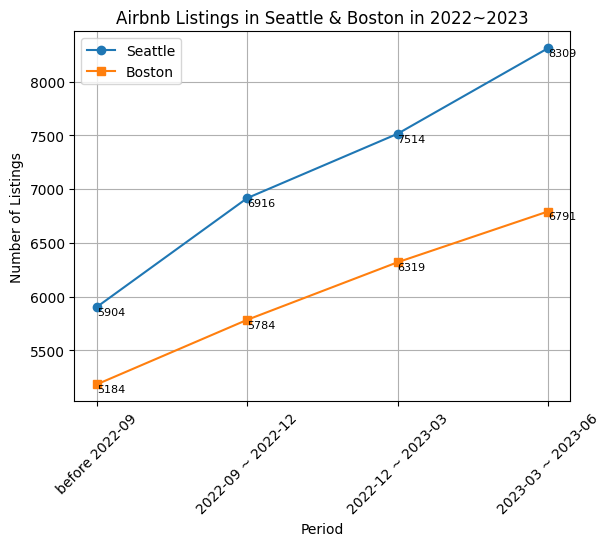

In [17]:
plt.plot(categories, listing_cnt[0], marker='o', label="Seattle")
plt.plot(categories, listing_cnt[1], marker='s', label="Boston")

ax = plt.gca()
for i, j in zip(categories, listing_cnt[0]):
    ax.text(i, j, f'{j}', ha='left', va='top', fontsize=8)

for i, j in zip(categories, listing_cnt[1]):
    ax.text(i, j, f'{j}', ha='left', va='top', fontsize=8)

plt.title("Airbnb Listings in Seattle & Boston in 2022~2023")
plt.ylabel("Number of Listings")
plt.xlabel("Period")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend();

In [18]:
df_listing_total.describe()

,id,last_scraped,host_id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.510000e+04,15100,1.510000e+04,15098.000000,15098.000000,15098.000000,15098.000000,0.0,13280.000000,14885.00000,15098.000000,15093.000000,15093.000000,15093.000000,1.509300e+04,0.0,15098.000000,15098.000000,15098.000000,15098.000000,15098.000000,15098.000000,10791.000000,10775.000000,10776.000000,10774.000000,10776.000000,10774.000000,10774.000000,15098.000000,15098.000000,15098.000000,15098.000000,10791.000000
mean,2.859021e+17,2022-11-03 11:16:48,1.475713e+08,458.421049,45.249537,-99.285942,3.650748,NaN,1.775602,2.00262,568.504173,22.106539,65.626582,63.169867,1.745849e+06,NaN,10.354749,26.693933,46.211021,42.894688,12.238243,1.358723,4.738901,4.795998,4.762365,4.852765,4.839654,4.808617,4.668356,50.242350,39.517420,10.690621,0.012982,2.148570
min,3.168000e+03,2022-09-15 00:00:00,2.536000e+03,1.000000,42.231170,-122.420700,0.000000,NaN,1.000000,1.00000,1.000000,0.000000,1.000000,0.200000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.781828e+07,2022-09-15 00:00:00,2.165109e+07,2.000000,42.350931,-122.336504,2.000000,NaN,1.000000,1.00000,90.000000,1.000000,2.000000,2.000000,3.650000e+02,NaN,0.000000,4.000000,16.000000,0.000000,0.000000,0.000000,4.670000,4.760000,4.700000,4.860000,4.840000,4.760000,4.570000,1.000000,1.000000,0.000000,0.000000,0.540000
50%,5.073426e+07,2022-09-18 00:00:00,9.824366e+07,7.000000,47.542370,-122.287922,3.000000,NaN,1.000000,2.00000,365.000000,3.000000,5.000000,4.000000,1.125000e+03,NaN,7.000000,26.000000,51.000000,6.000000,2.000000,0.000000,4.870000,4.920000,4.900000,4.960000,4.960000,4.910000,4.780000,4.000000,2.000000,0.000000,0.000000,1.540000
75%,6.767658e+17,2022-12-21 00:00:00,2.635022e+08,86.000000,47.626902,-71.086442,4.000000,NaN,2.000000,3.00000,1125.000000,30.000000,30.000000,30.000000,1.125000e+03,NaN,18.000000,46.000000,74.000000,45.000000,15.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.920000,31.000000,15.000000,2.000000,0.000000,3.130000
max,9.198184e+17,2023-06-25 00:00:00,5.211079e+08,5646.000000,47.748000,-70.913250,16.000000,NaN,16.000000,22.00000,30000.000000,730.000000,998.000000,740.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,1185.000000,406.000000,27.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,477.000000,477.000000,274.000000,7.000000,18.110000
std,3.594116e+17,NaN,1.524749e+08,1227.297490,2.626675,25.493816,2.449184,NaN,1.124835,1.44106,540.351573,49.728985,170.036977,164.687217,5.797421e+07,NaN,10.410880,21.150368,31.235748,85.138245,21.218873,2.234025,0.435138,0.377148,0.399478,0.343237,0.371891,0.321109,0.425350,112.255439,107.039935,42.741380,0.198266,2.077441


In [19]:
df_listing_total.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,location
0,53939356,https://www.airbnb.com/rooms/53939356,20220918143902,2022-09-18,city scrape,FIR - Large Private room in Lake Forest with sink,Enjoy easy access to everything from this cent...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,435279521,https://www.airbnb.com/users/show/435279521,Nathan,2021-12-08,"Lake Forest Park, WA",NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/42b0f...,https://a0.muscache.com/im/pictures/user/42b0f...,NaN,7,9.0,"['email', 'phone']",t,t,NaN,Cedar Park,Lake City,47.73908,-122.29009,Private room in home,Private room,1.0,NaN,2 shared baths,1.0,1.0,"[""Toaster"", ""Iron"", ""Long term stays allowed"",...",$42.00,1,365.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,29.0,59.0,89.0,364,2022-09-18,9.0,9.0,3.0,2022-06-04,2022-09-16,4.33,4.67,4.22,5.00,4.78,4.33,4.44,NaN,t,7.0,0.0,7.0,0.0,2.52,seattle
1,630392837253857024,https://www.airbnb.com/rooms/630392837253856994,20220918143902,2022-09-18,city scrape,"Water-view retreat with deck, grill, paddleboa...",<b>The space</b><br />Lake View Retreat<br /><...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,104834083,https://www.airbnb.com/users/show/104834083,Vacasa Washington,2016-11-22,NaN,Vacasa\nVacation Home Management\n\nVacasa unl...,within an hour,98%,99%,f,https://a0.muscache.com/im/pictures/user/09936...,https://a0.muscache.com/im/pictures/user/09936...,West Seattle,430,578.0,"['email', 'phone']",t,t,NaN,Rainier Beach,Rainier Valley,47.50846,-122.23577,Entire rental unit,Entire home/apt,5.0,NaN,1 bath,2.0,4.0,"[""Gym"", ""Children\u2019s dinnerware"", ""Stove"",...",$194.00,3,365.0,3.0,5.0,29.0,365.0,3.1,31.3,NaN,t,25.0,55.0,85.0,360,2022-09-18,2.0,2.0,1.0,2022-08-10,2022-08-26,4.50,4.50,5.00,4.00,4.50,4.50,4.50,NaN,t,46.0,46.0,0.0,0.0,1.50,seattle
2,19553441,https://www.airbnb.com/rooms/19553441,20220918143902,2022-09-18,city scrape,ALKI BEACH-AMAZING SEATTLE STEPS 2 BEACH/BOARD...,MESSAGE ME IF HOME IS NOT AVAILABLE. I HAVE 2 ...,Alki Beach is the most beautiful neighborhood ...,https://a0.muscache.com/pictures/126b8988-e6a0...,25383292,https://www.airbnb.com/users/show/25383292,Margaret,2014-12-30,"Seattle, WA","Hello Travlers, \nHealth and Safety are our n...",NaN,NaN,33%,t,https://a0.muscache.com/im/pictures/user/3cbe4...,https://a0.muscache.com/im/pictures/user/3cbe4...,Alki,2,2.0,"['email', 'phone']",t,t,"Seattle, Washington, United States",Alki,West Seattle,47.58493,-122.40062,Entire home,Entire home/apt,6.0,NaN,3 baths,3.0,3.0,"[""Toaster"", ""Barbecue utensils"", ""Children\u20...",$595.00,30,30.0,30.0,30.0,30.0,30.0,30.0,30.0,NaN,t,29.0,59.0,89.0,104,2022-09-18,20.0,0.0,0.0,2017-08-14,2018-09-23,5.00,

In [20]:
df_listing_total.query('review_scores_rating == 0').count()[0]

/tmp/ipykernel_20806/594729033.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_listing_total.query('review_scores_rating == 0').count()[0]


15

In [21]:
df_listing_total.query('number_of_reviews < 10').count()[0]

/tmp/ipykernel_20806/2704692925.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_listing_total.query('number_of_reviews < 10').count()[0]


8285

In [22]:
df_listing_total.shape

(15100, 76)

In [23]:
df_listing_total["review_scores_rating"].isna().sum()

4309

In [24]:
df_listing_total["number_of_reviews"].isna().sum()

2

In [25]:
df_listing_total_w_reviews = df_listing_total.query("number_of_reviews > 0")

In [26]:
#df_listing_total.head()
df_listing_total_w_reviews["amenities"].value_counts()
#df_listing_total_w_reviews["amenities"].isna().sum()
#df_listing_total.query("number_of_reviews < 1").count()[0]
#df_listing_total["number_of_reviews"].hist()

amenities
["Bed linens", "Dishes and silverware", "Cleaning products", "Long term stays allowed", "Stove", "Wifi", "Refrigerator", "Paid parking off premises", "Oven", "TV", "Washer", "Hangers", "Freezer", "Elevator", "Hot water kettle", "Hot water", "Hair dryer", "Dryer", "Coffee maker", "Conditioner", "Extra pillows and blankets", "Gym", "Baking sheet", "Essentials", "Smoke alarm", "Clothing storage", "Wine glasses", "Dining table", "Crib - available upon request", "Dishwasher", "Kitchen", "Shampoo", "Cooking basics", "Carbon monoxide alarm", "Ethernet connection", "Window guards", "Body soap", "Iron", "Building staff", "Shower gel", "Microwave", "Toaster", "Heating"]                                                                                     22
["Bed linens", "Dishes and silverware", "Long term stays allowed", "Stove", "Wifi", "Refrigerator", "Paid parking off premises", "TV with standard cable", "Washer", "Hangers", "Smart lock", "Hot water", "Hair dryer", "Dryer", "Coffee 

In [27]:
features_categorical = ["host_is_superhost", "host_verifications", "host_has_profile_pic",
                        "host_identity_verified", "property_type", "room_type", "amenities"] # amenities processed seperately
features_numerical = ["host_response_time", "host_response_rate", "host_acceptance_rate",
                      "calculated_host_listings_count", "accommodates", "bathrooms",
                      "bedrooms", "beds", "price", "number_of_reviews"]

In [28]:
df_listing_total_w_reviews["number_of_reviews"].isna().sum()

0

In [29]:
#amenities = np.unique(np.concatenate(df_listing_total_w_reviews.amenities.str[1:-1].str.replace('"','').str.split(",")))[1:]
total_amenities = np.concatenate(np.array(df_listing_total_w_reviews.amenities.str[1:-1].str.replace('"','').str.split(", ")))
total_amenities = np.array([s.strip() for s in total_amenities])
#print(total_amenities.size)
#np.concatenate(df_listing_total_w_reviews.amenities.str[1:-1].str.replace('"','').str.split(","))
#unique_amenities = np.unique(np.concatenate(np.array(df_listing_total_w_reviews.amenities.str[1:-1].str.replace('"','').str.split(",  "))))
amenities = np.unique(total_amenities)
counts = []
for ame in amenities:
    counts.append((total_amenities==ame).sum())

ser = pd.Series(counts, index=amenities.tolist()).sort_values(ascending=False)

In [30]:
amenities_100 = ser[:100]

In [31]:
df_listing_total_w_reviews_temp = df_listing_total_w_reviews[:10]

In [32]:
def amenities_convert (col, ame):
    #print(col, ame)
    return ame in col

In [33]:
for ame in amenities_100.index:
    df_listing_total_w_reviews["amenities_"+ame]  = df_listing_total_w_reviews["amenities"].apply(amenities_convert, args=(ame,))

/tmp/ipykernel_20806/3889874547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listing_total_w_reviews["amenities_"+ame]  = df_listing_total_w_reviews["amenities"].apply(amenities_convert, args=(ame,))
/tmp/ipykernel_20806/3889874547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listing_total_w_reviews["amenities_"+ame]  = df_listing_total_w_reviews["amenities"].apply(amenities_convert, args=(ame,))
/tmp/ipykernel_20806/3889874547.py:2: SettingWithCopyWarning: 
A value is trying to be set o

In [34]:
df_listing_total_w_reviews.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,...,amenities_Free dryer \u2013 In unit,amenities_Private patio or balcony,amenities_Outdoor dining area,amenities_Lockbox,amenities_Free washer \u2013 In unit,amenities_Backyard,amenities_Cable TV,amenities_Laundromat nearby,amenities_Indoor fireplace,amenities_Patio or balcony,amenities_Lock on bedroom door,amenities_Smart lock,amenities_Central heating,amenities_TV with standard cable,amenities_Ethernet connection,amenities_Self check-in,amenities_Elevator,amenities_Clothing storage: closet,amenities_Single level home,amenities_Pack \u2019n play/Travel crib,amenities_Board games,amenities_Clothing storage,amenities_Barbecue utensils,amenities_Mini fridge,amenities_Netflix,amenities_Central air conditioning,amenities_Paid parking off premises,amenities_Keurig coffee machine,amenities_Shared patio or balcony,amenities_Window AC unit,amenities_Stainless steel oven,amenities_Ceiling fan,amenities_Coffee,amenities_Children\u2019s books and toys,amenities_Rice maker,amenities_Drying rack for clothing,amenities_Fire pit,amenities_Children\u2019s dinnerware,amenities_Gym,amenities_High chair,amenities_Private fenced garden or backyard,amenities_Portable air conditioning,amenities_Radiant heating,amenities_Crib,amenities_Paid parking on premises,amenities_Host greets you,amenities_Pets allowed,amenities_Paid washer \u2013 In building,amenities_Paid dryer \u2013 In building,amenities_Breakfast
0,53939356,https://www.airbnb.com/rooms/53939356,20220918143902,2022-09-18,city scrape,FIR - Large Private room in Lake Forest with sink,Enjoy easy access to everything from this cent...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,435279521,https://www.airbnb.com/users/show/435279521,Nathan,2021-12-08,"Lake Forest Park, WA",NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/42b0f...,https://a0.muscache.com/im/pictures/user/42b0f...,NaN,7,9.0,"['email', 'phone']",t,t,NaN,Cedar Park,Lake City,47.73908,-122.29009,Private room in home,Private room,1.0,NaN,2 shared baths,1.0,1.0,"[""Toaster"", ""Iron"", ""Long term stays allowed"",...",$42.00,1,365.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,630392837253857024,https://www.airbnb.com/rooms/630392837253856994,20220918143902,2022-09-18,city scrape,"Water-view retreat with deck, grill, paddleboa...",<b>The space</b><br />Lake View Retreat<br /><...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,104834083,https://www.airbnb.com/users/show/104834083,Vacasa Washington,2016-11-22,NaN,Vacasa\nVacation Home Management\n\nVacasa unl...,within an hour,98%,99%,f,https://a0.muscache.com/im/pictures/user/09936...,https://a0.muscache.com/im/pictures/user/09936...,West Seattle,430,578.0,"['email', 'phone']",t,t,NaN,Rainier Beach,Rainier Valley,47.50846,-122.23577,Entire rental unit,Entire home/apt,5.0,NaN,1 bath,2.0,4.0,"[""Gym"", ""Children\u2019s dinnerware"", ""Stove"",...",$194.00,3,365.0,3.0,5.0,29.0,365.0,3.1,31.3,NaN,...,False,False,

In [37]:
df_listing_total_w_reviews[features_numerical].isna().mean().sort_values(ascending=False)

bathrooms                         1.000000
bedrooms                          0.116579
host_response_time                0.097489
host_response_rate                0.097489
host_acceptance_rate              0.073580
beds                              0.014178
calculated_host_listings_count    0.000000
accommodates                      0.000000
price                             0.000000
number_of_reviews                 0.000000
dtype: float64

In [38]:
df_listing_total_w_reviews[features_categorical].isna().mean().sort_values(ascending=False)

host_is_superhost         0.01251
host_verifications        0.00000
host_has_profile_pic      0.00000
host_identity_verified    0.00000
property_type             0.00000
room_type                 0.00000
amenities                 0.00000
dtype: float64

In [40]:
df_listing_total_w_reviews.drop(columns=["bathrooms"], inplace=True)

/tmp/ipykernel_20806/3363656850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listing_total_w_reviews.drop(columns=["bathrooms"], inplace=True)


In [44]:
features_numerical.remove("bathrooms")

In [42]:
df_listing_total_w_reviews_cleaned = df_listing_total_w_reviews.copy()

In [45]:
df_listing_total_w_reviews_cleaned[features_numerical].fillna(df_listing_total_w_reviews_cleaned[features_numerical].median())

TypeError: could not convert string to float: 'within an hour'

In [19]:
def dataWrangle2 (df):
    retframe = df.copy()
    
    retframe["bathrooms"] = pd.to_numeric(retframe['bathrooms'], errors='coerce')
    retframe["bedrooms"] = pd.to_numeric(retframe['bedrooms'], errors='coerce')
    retframe["beds"] = pd.to_numeric(retframe['beds'], errors='coerce')
    retframe["price"] = pd.to_numeric(retframe['price'], errors='coerce')
    retframe["accommodates"] = pd.to_numeric(retframe['accommodates'], errors='coerce')
    retframe = retframe.dropna(subset=['bathrooms','bedrooms','beds','price','accommodates'])    
    
    retframe["bathrooms"] = retframe["bathrooms"].astype(int)
    retframe["bedrooms"] = retframe["bedrooms"].astype(int)
    retframe["beds"] = retframe["beds"].astype(int)
    retframe["price"] = retframe["price"].astype(float)
    retframe["accommodates"] = retframe["accommodates"].astype(float)
    
    retframe = retframe.query('bathrooms > 0 \
                        and bedrooms > 0 \
                        and beds > 0 \
                        and price > 0 \
                        and accommodates > 0')
    
    return retframe

In [20]:
df_calendar_boston = pd.read_csv(os.path.join(boston_data_path, "total_calendars.csv"))
df_calendar_seattle = pd.read_csv(os.path.join(seattle_data_path, "total_calendars.csv"))

df_calendar_seattle["location"] = "seattle"
df_calendar_boston["location"] = "boston"
#df_calendar_total = pd.concat([df_calendar_seattle, df_calendar_boston]).reset_index(drop=True)

In [21]:
df_calendar_seattle.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,location
0,53939356,2022-09-18,f,$38.00,$38.00,1.0,1125.0,seattle
1,53939356,2022-09-19,t,$37.00,$37.00,1.0,1125.0,seattle
2,53939356,2022-09-20,t,$37.00,$37.00,1.0,1125.0,seattle
3,53939356,2022-09-21,t,$39.00,$39.00,1.0,1125.0,seattle
4,53939356,2022-09-22,t,$39.00,$39.00,1.0,1125.0,seattle


In [22]:
def dataWrangle3 (df):
    ret = df.copy()
    ret['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)
    ret = ret.dropna(subset=["price"])
    return ret

In [23]:
df_calendar_seattle = dataWrangle3(df_calendar_seattle)
df_calendar_boston = dataWrangle3(df_calendar_boston)

In [24]:
df_calendar_seattle.dtypes

listing_id          int64
date               object
available          object
price             float64
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
location           object
dtype: object

In [25]:
group = df_calendar_seattle.groupby(["listing_id", "date"])

In [26]:
# Calculate the count of records in each group
group_counts = group.size()
# Sort the groups based on count in descending order
sorted_groups = group_counts.sort_values(ascending=False)
# Take the first 5 groups with the maximum count
top_groups = sorted_groups.head(5)

print(top_groups)

listing_id          date      
50658154            2023-07-30    4
601431413510482385  2023-07-26    4
                    2023-07-24    4
                    2023-07-23    4
                    2023-07-22    4
dtype: int64


In [27]:
#df_calendar_seattle.query('listing_id == 50658154 and date == "2023-08-06"')
df_calendar_seattle.query('date == "2024-06-28"')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,location
7430511,33225888,2024-06-28,f,350.0,$350.00,3.0,1125.0,seattle
8018162,52719504,2024-06-28,f,120.0,$120.00,3.0,90.0,seattle


In [28]:
#list(df_calendar_seattle["date"].value_counts().sort_index())
df_calendar_boston["date"].value_counts().sort_index()

2022-09-15    5182
2022-09-16    5182
2022-09-17    5182
2022-09-18    5182
2022-09-19    5182
              ... 
2024-06-16    3973
2024-06-17    3973
2024-06-18    3973
2024-06-19    3973
2024-06-20    3856
Name: date, Length: 645, dtype: int64

In [29]:
df_calendar_seattle["date"].value_counts().sort_index()

2022-09-18    5874
2022-09-19    5874
2022-09-20    5874
2022-09-21    5874
2022-09-22    5875
              ... 
2024-06-24       2
2024-06-25       2
2024-06-26       2
2024-06-27       2
2024-06-28       2
Name: date, Length: 650, dtype: int64

In [30]:
df_calendar_boston["date"].value_counts().sort_index()

2022-09-15    5182
2022-09-16    5182
2022-09-17    5182
2022-09-18    5182
2022-09-19    5182
              ... 
2024-06-16    3973
2024-06-17    3973
2024-06-18    3973
2024-06-19    3973
2024-06-20    3856
Name: date, Length: 645, dtype: int64

2022-09-18 ~ 2024-06-20

In [31]:
df_listing_total[df_listing_total["first_review"].isna()].count()[0]

4272

In [32]:
df_calendar_seattle.describe()

,listing_id,price,minimum_nights,maximum_nights
count,9.143422e+06,9.143422e+06,9.135613e+06,9.135613e+06
mean,2.369617e+17,2.027991e+02,3.812691e+01,1.029230e+06
std,3.340468e+17,2.221217e+02,1.124420e+02,4.698356e+07
min,6.606000e+03,1.000000e+01,0.000000e+00,0.000000e+00
25%,2.505586e+07,1.070000e+02,2.000000e+00,3.650000e+02
50%,4.971651e+07,1.540000e+02,3.000000e+00,1.125000e+03
75%,6.298934e+17,2.410000e+02,3.000000e+01,1.125000e+03
max,9.198184e+17,9.910000e+04,7.300000e+02,2.147484e+09


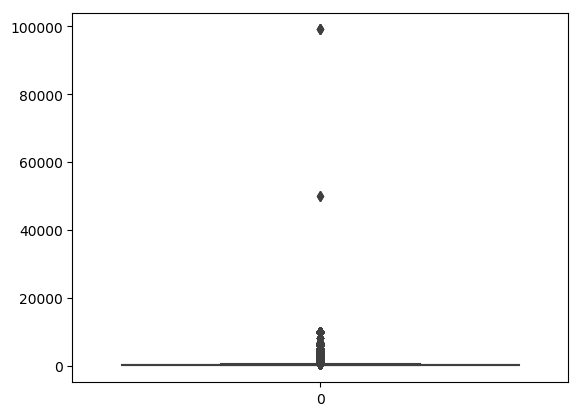

In [33]:
#plt.boxplot(df_calendar_seattle["price"])
sns.boxplot(data=df_calendar_seattle["price"])

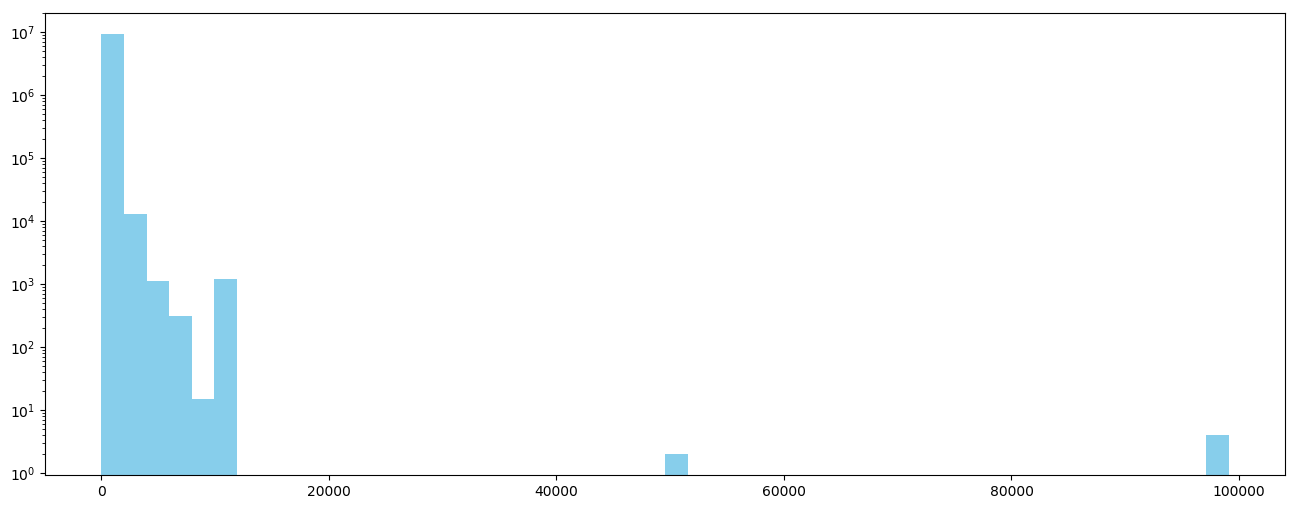

In [34]:
fig = plt.figure(figsize=(16, 6))
plt.hist(df_calendar_seattle["price"], bins=50, color='skyblue',  log=True);

(array([9.141523e+06, 6.910000e+02, 1.202000e+03, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 2.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 4.000000e+00]),
 array([1.00000e+01, 4.96450e+03, 9.91900e+03, 1.48735e+04, 1.98280e+04,
        2.47825e+04, 2.97370e+04, 3.46915e+04, 3.96460e+04, 4.46005e+04,
        4.95550e+04, 5.45095e+04, 5.94640e+04, 6.44185e+04, 6.93730e+04,
        7.43275e+04, 7.92820e+04, 8.42365e+04, 8.91910e+04, 9.41455e+04,
        9.91000e+04]),
 <a list of 20 Patch objects>)

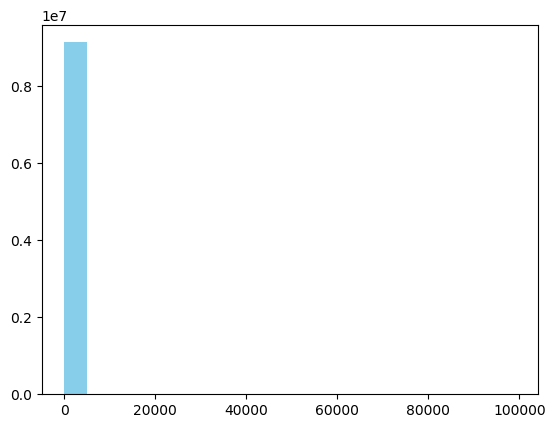

In [35]:
plt.hist(df_calendar_seattle["price"], bins=20, color='skyblue')

In [36]:
df_calendar_seattle.query('price > 8000').count()[0]

1223

In [37]:
df_calendar_seattle = df_calendar_seattle.query('price < 10000')

In [38]:
df_calendar_boston.describe()

,listing_id,price,minimum_nights,maximum_nights
count,6.102434e+06,6.102434e+06,6.102414e+06,6.102414e+06
mean,2.101112e+17,2.465893e+02,6.860893e+01,4.444722e+06
std,3.235666e+17,3.986464e+02,1.411571e+02,9.758799e+07
min,3.168000e+03,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.348674e+07,9.900000e+01,2.000000e+00,3.650000e+02
50%,4.687371e+07,1.750000e+02,2.500000e+01,1.125000e+03
75%,5.978095e+17,2.810000e+02,9.100000e+01,1.125000e+03
max,9.186904e+17,1.530000e+04,9.980000e+02,2.147484e+09


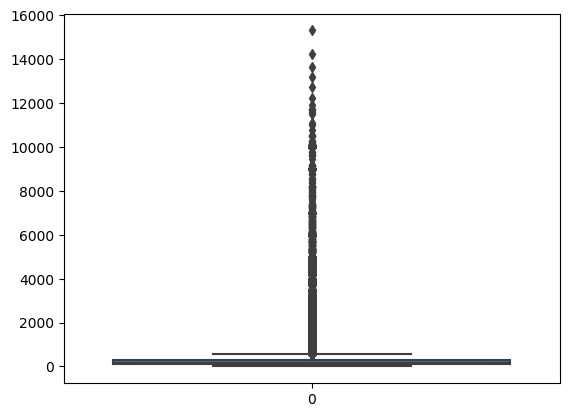

In [39]:
sns.boxplot(data=df_calendar_boston["price"])

In [40]:
df_calendar_boston.query('price > 1000').count()[0]

102985

In [41]:
df_calendar_boston.dropna(subset=["price"], inplace=True)

(array([6.071237e+06, 1.754400e+04, 5.365000e+03, 2.478000e+03,
        4.480000e+02, 2.810000e+02, 5.066000e+03, 1.000000e+01,
        3.000000e+00, 2.000000e+00]),
 array([    0.,  1530.,  3060.,  4590.,  6120.,  7650.,  9180., 10710.,
        12240., 13770., 15300.]),
 <a list of 10 Patch objects>)

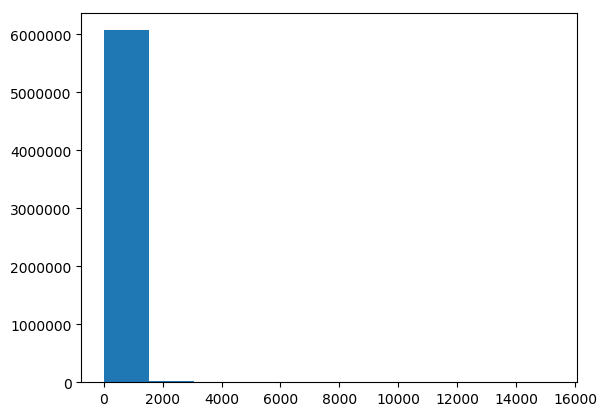

In [42]:
plt.hist(df_calendar_boston["price"])

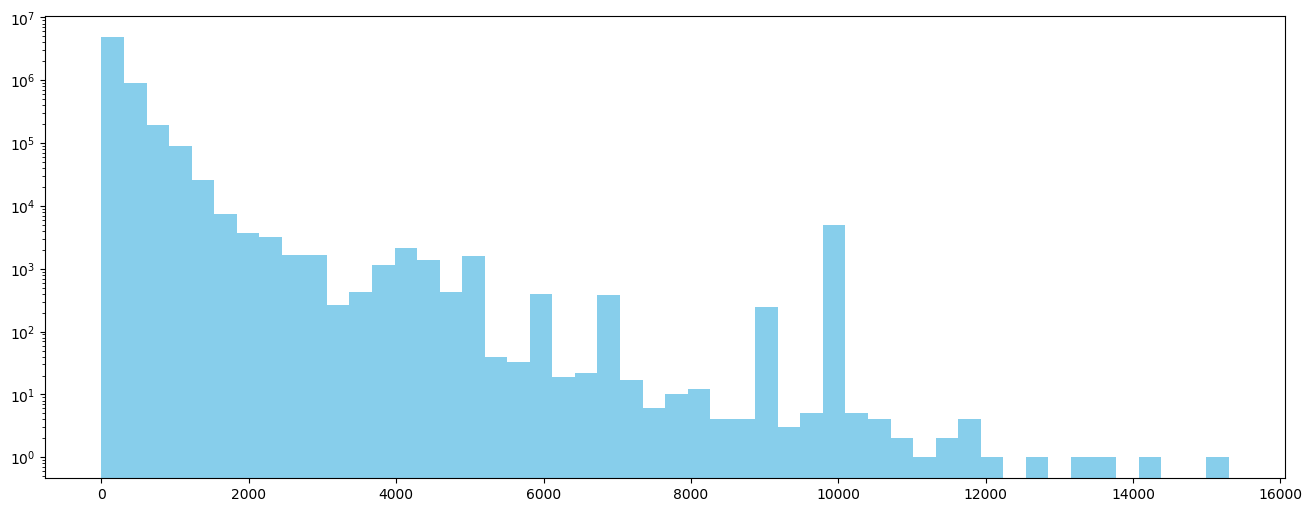

In [43]:
fig = plt.figure(figsize=(16, 6))
plt.hist(df_calendar_boston["price"], bins=50, color='skyblue',  log=True);

In [44]:
df_calendar_seattle = df_calendar_seattle.query('price < 3000')
df_calendar_boston = df_calendar_boston.query('price < 3000')

In [66]:
start_date = datetime.strptime("2022-09-19", "%Y-%m-%d") # monday
end_date = datetime.strptime("2024-06-16", "%Y-%m-%d") # sunday

dates_array = []

while start_date <= end_date:
    dates_array.append(start_date.strftime("%Y-%m-%d"))
    start_date += timedelta(days=7)

print(dates_array)

['2022-09-19', '2022-09-26', '2022-10-03', '2022-10-10', '2022-10-17', '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14', '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12', '2022-12-19', '2022-12-26', '2023-01-02', '2023-01-09', '2023-01-16', '2023-01-23', '2023-01-30', '2023-02-06', '2023-02-13', '2023-02-20', '2023-02-27', '2023-03-06', '2023-03-13', '2023-03-20', '2023-03-27', '2023-04-03', '2023-04-10', '2023-04-17', '2023-04-24', '2023-05-01', '2023-05-08', '2023-05-15', '2023-05-22', '2023-05-29', '2023-06-05', '2023-06-12', '2023-06-19', '2023-06-26', '2023-07-03', '2023-07-10', '2023-07-17', '2023-07-24', '2023-07-31', '2023-08-07', '2023-08-14', '2023-08-21', '2023-08-28', '2023-09-04', '2023-09-11', '2023-09-18', '2023-09-25', '2023-10-02', '2023-10-09', '2023-10-16', '2023-10-23', '2023-10-30', '2023-11-06', '2023-11-13', '2023-11-20', '2023-11-27', '2023-12-04', '2023-12-11', '2023-12-18', '2023-12-25', '2024-01-01', '2024-01-08', '2024-01-15', '2024-01-22', '2024

In [67]:
avg_price_seattle_arr = []
std_price_seattle_arr = []
avg_price_boston_arr = []
std_price_boston_arr = []
startdate = dates_array[0]
for date in dates_array[1:]:
    subset = df_calendar_seattle.query('date >= "{}" and date < "{}"'.format(startdate, date))
    avg_price_seattle_arr.append(subset["price"].mean())
    std_price_seattle_arr.append(subset["price"].std())
    
    subset = df_calendar_boston.query('date >= "{}" and date < "{}"'.format(startdate, date))
    avg_price_boston_arr.append(subset["price"].mean())
    std_price_boston_arr.append(subset["price"].std())

    startdate = date

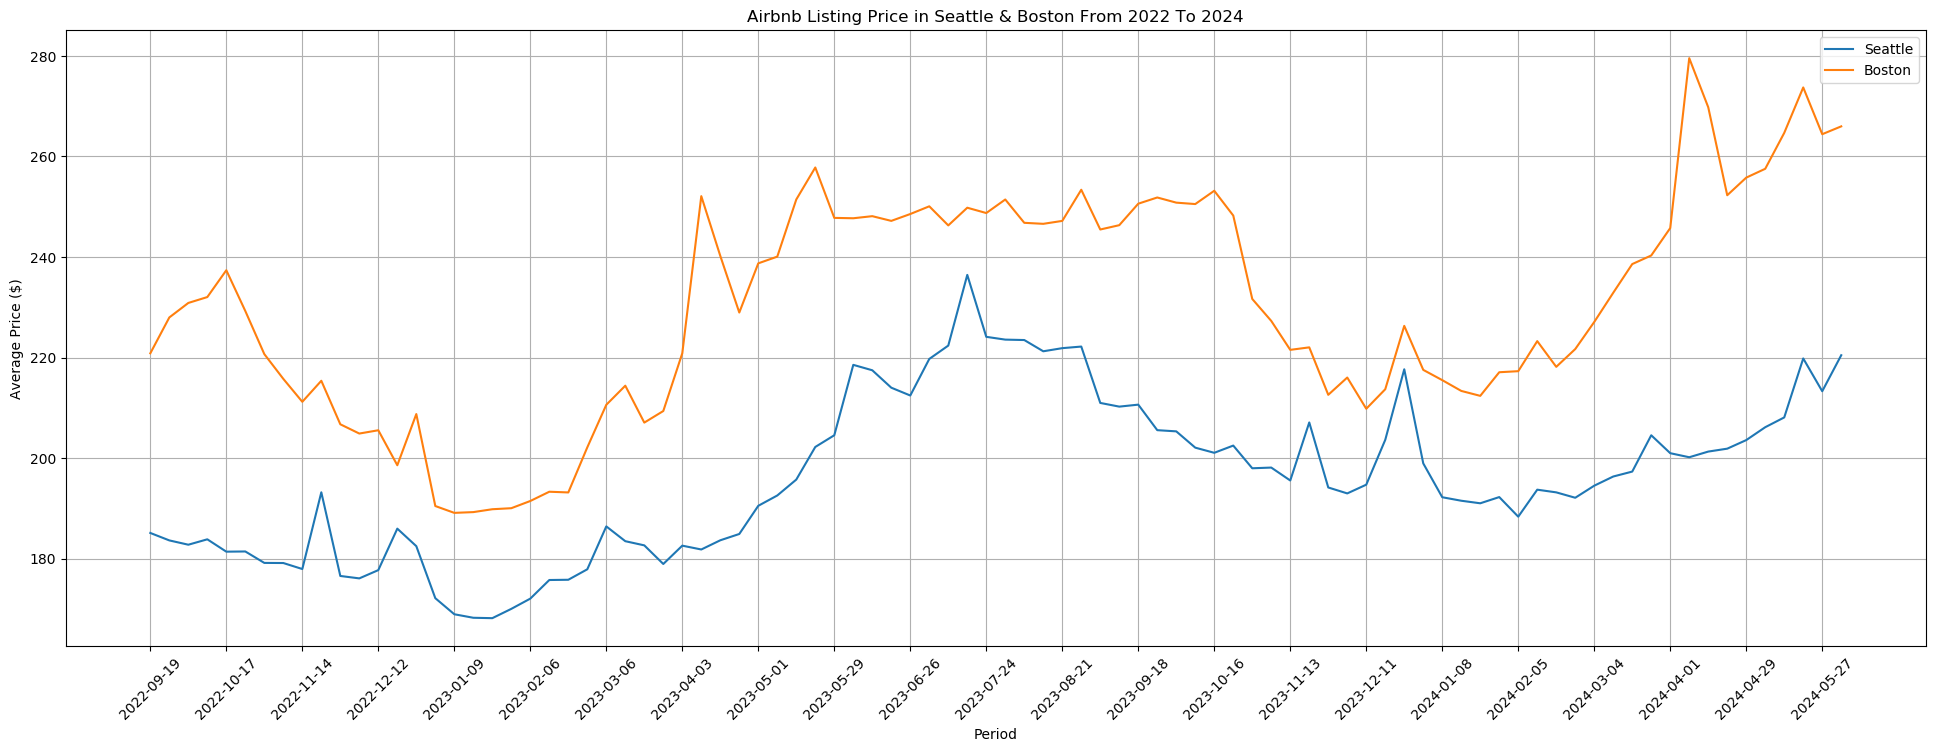

In [68]:
fig = plt.figure(figsize=(24, 8))
plt.plot(dates_array[:-1], avg_price_seattle_arr, label="Seattle")
#plt.errorbar(dates_array[:-1], avg_price_seattle_arr, yerr=std_price_seattle_arr, fmt='none')

plt.plot(dates_array[:-1], avg_price_boston_arr, label="Boston")

plt.xticks(dates_array[::4])

# ax = plt.gca()
# for i, j in zip(categories, listing_cnt[0]):
#     ax.text(i, j, f'{j}', ha='left', va='top', fontsize=8)

# for i, j in zip(categories, listing_cnt[1]):
#     ax.text(i, j, f'{j}', ha='left', va='top', fontsize=8)

plt.title("Airbnb Listing Price in Seattle & Boston From 2022 To 2024")
plt.ylabel("Average Price ($)")
plt.xlabel("Period")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend();

In [56]:
start_date = datetime.strptime("2022-09-19", "%Y-%m-%d") # monday
end_date = datetime.strptime("2022-10-19", "%Y-%m-%d") # sunday

dates_array = []

while start_date <= end_date:
    dates_array.append(start_date.strftime("%Y-%m-%d"))
    start_date += timedelta(days=1)

print(dates_array)

['2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19']


In [57]:
avg_price_seattle_arr = []
std_price_seattle_arr = []
avg_price_boston_arr = []
std_price_boston_arr = []
for date in dates_array:
    subset = df_calendar_seattle.query('date == "{}"'.format(date))
    avg_price_seattle_arr.append(subset["price"].mean())
    std_price_seattle_arr.append(subset["price"].std())
    
    subset = df_calendar_boston.query('date == "{}"'.format(date))
    avg_price_boston_arr.append(subset["price"].mean())
    std_price_boston_arr.append(subset["price"].std())

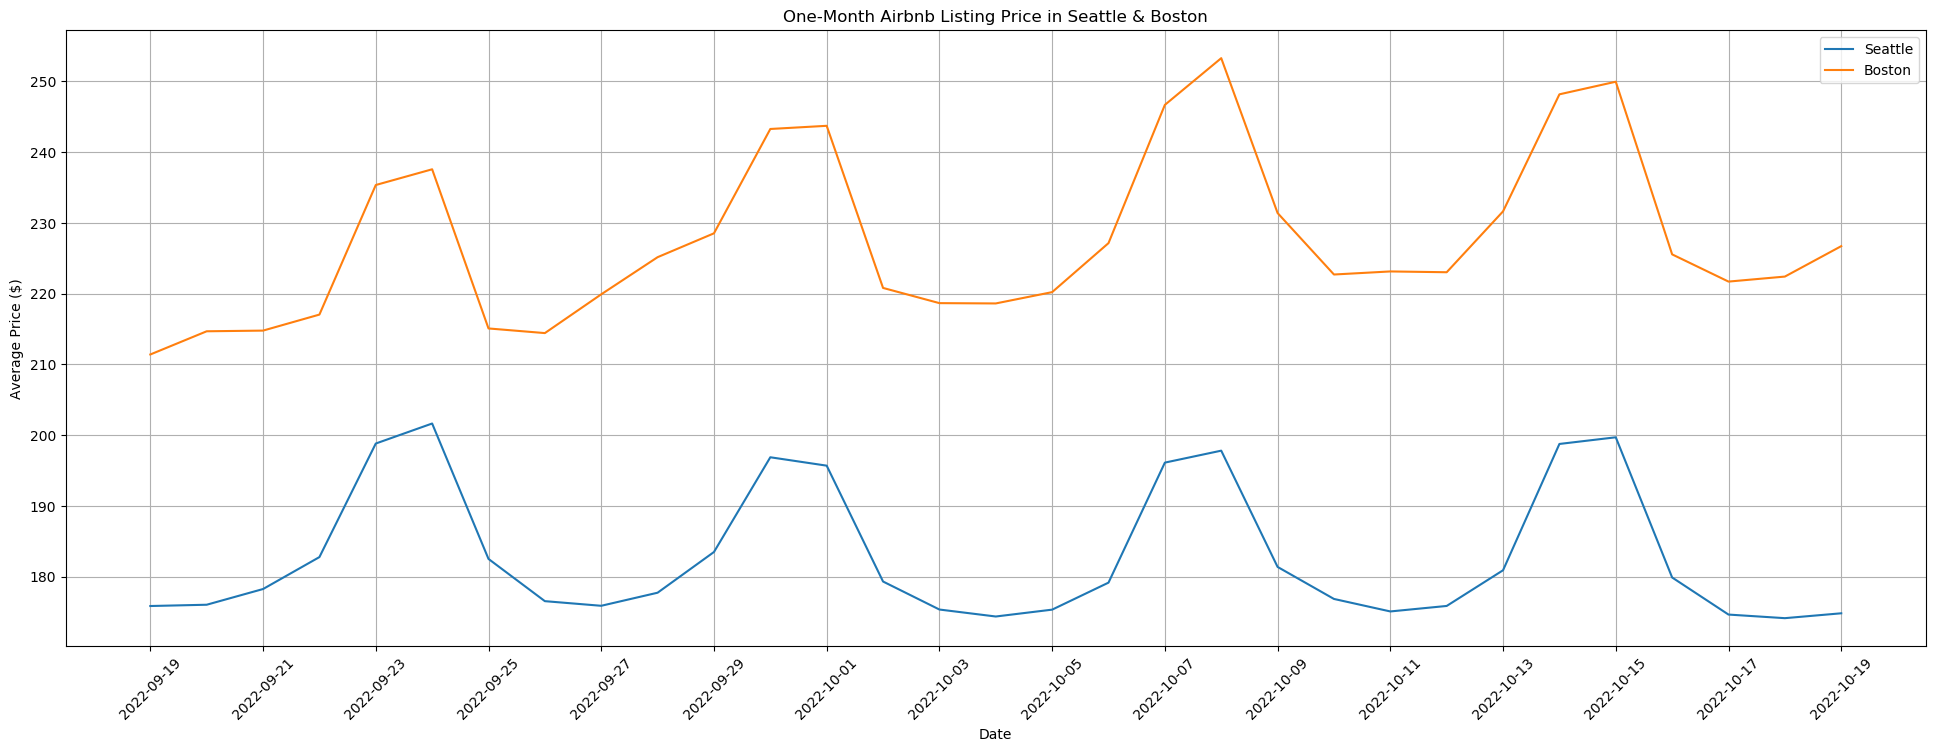

In [63]:
fig = plt.figure(figsize=(24, 8))
plt.plot(dates_array, avg_price_seattle_arr, label="Seattle")
#plt.errorbar(dates_array[:-1], avg_price_seattle_arr, yerr=std_price_seattle_arr, fmt='none')

plt.plot(dates_array, avg_price_boston_arr, label="Boston")

plt.xticks(dates_array[::2])

plt.title("One-Month Airbnb Listing Price in Seattle & Boston")
plt.ylabel("Average Price ($)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend();

In [87]:
df_listing_total.query('number_of_reviews < 1').count()[0]

4272

In [80]:
df_listing_total["number_of_reviews"].isna().sum()

0

In [83]:
df_listing_total["reviews_per_month"].isna().sum()

4272

In [84]:
df_listing_total["review_scores_rating"].isna().sum()

4272

In [88]:
#df_listing_total.query('review_scores_rating.isnull() and not number_of_reviews.isnull()')[:5]
df_listing_total.query('number_of_reviews == 1')[:5]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,location
23,25905002,https://www.airbnb.com/rooms/25905002,20220918143902,2022-09-18,city scrape,"Near Bus, Seattle, Lynnwood, (No Other Charges)","Very nice, clean and comfortable room.",Safe and quiet neighborhood,https://a0.muscache.com/pictures/8beb160c-80ce...,193023955,https://www.airbnb.com/users/show/193023955,Miss V,2018-06-02,"Seattle, WA","My husband and I are both fun loving, cheerful...",within a few hours,100%,65%,f,https://a0.muscache.com/im/pictures/user/52f88...,https://a0.muscache.com/im/pictures/user/52f88...,NaN,7,10,"['email', 'phone']",t,t,"Shoreline, Washington, United States",Haller Lake,Northgate,47.74563,-122.33130,Private room in home,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Toaster"", ""Stove"", ""Building staff"", ""Iron"",...",$87.00,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,28,58,88,363,2022-09-18,1,1,1,2022-08-22,2022-08-22,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,f,3,0,3,0,1.00,seattle
48,68508,https://www.airbnb.com/rooms/68508,20220918143902,2022-09-18,previous scrape,"Private Entry 180º Views City, Mountains & Lake",Medina Properties has been providing furnished...,Capitol Hill is situated on a steep hill just ...,https://a0.muscache.com/pictures/miso/Hosting-...,340192,https://www.airbnb.com/users/show/340192,Angela,2011-01-08,"Seattle, WA",Medina Properties has been providing furnished...,within a day,100%,50%,f,https://a0.muscache.com/im/pictures/user/5a304...,https://a0.muscache.com/im/pictures/user/5a304...,Capitol Hill,2,5,"['email', 'phone']",t,t,"Seattle, Washington, United States",Eastlake,Cascade,47.63815,-122.32344,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Stove"", ""Iron"", ""Air conditioning"", ""Long te...",$165.00,7,90,7.0,7.0,1125.0,1125.0,7.0,1125.0,NaN,t,0,0,0,0,2022-09-18,1,1,0,2021-11-01,2021-11-01,5.0,5.0,5.0,5.0,5.0,5.0,5.0,STR-OPLI-19-002747,f,2,2,0,0,0.09,seattle
94,604600,https://www.airbnb.com/rooms/604600,20220918143902,2022-09-18,city scrape,Seattle 1 br,"One Bedroom: Queen in master, queen Murphy bed...",NaN,https://a0.muscache.com/pictures/5bc935bd-b4b5...,103427,https://www.airbnb.com/users/show/103427,Jacqueline M,2010-04-04,"San Francisco, CA",Hi everyone!! I am a bay area native and I lov...,within a day,58%,18%,f,https://a0.muscache.com/im/pictures/6ce63571-0...,https://a0.muscache.com/im/pictures/6ce63571-0...,Downtown Vancouver,204,286,"['email', 'phone']",t,t,NaN,Central Business District,Downtown,47.61326,-122.33148,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Gym"", ""Hot tub"", ""Iron"", ""Long term stays al...",$282.00,30,30,30.0,30.0,30.0,30.0,30.0,30.0,NaN,t,30,60,90,365,2022-09-18,1,0,0,2014-09-11,2014-09-11,5.0,5.0,

In [81]:
df_listing_total.shape

(15007, 76)

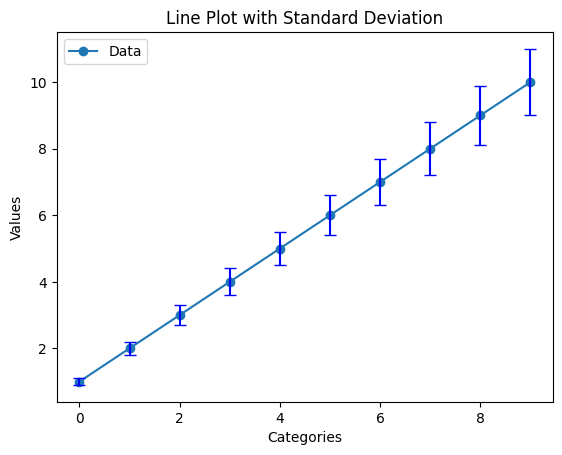

In [29]:
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
stds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the line plot
ax.plot(categories, values, marker='o', linestyle='-', label='Data')

# Add error bars
ax.errorbar(categories, values, yerr=stds, fmt='none', color='b', capsize=4)

# Set labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Line Plot with Standard Deviation')

# Add legend
ax.legend()

# Show the plot
plt.show()

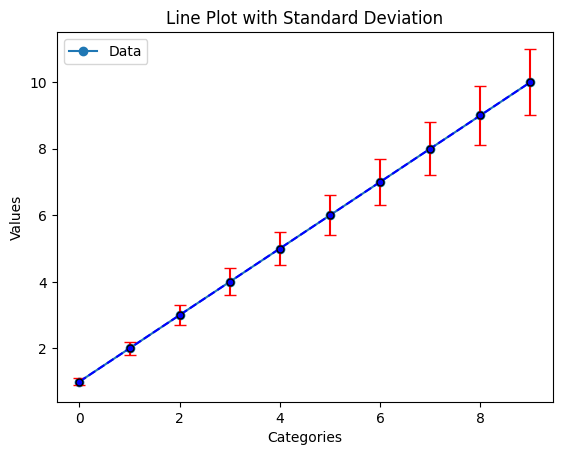

In [30]:
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
stds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the line plot
ax.plot(categories, values, marker='o', linestyle='-', label='Data')

# Add error bars with customizations
ax.errorbar(categories, values, yerr=stds, fmt='o', color='b', markersize=5,
            markeredgecolor='black', ecolor='red', capsize=4, capthick=1, linestyle='--')

# Set labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Line Plot with Standard Deviation')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [57]:
df_listing_total["property_type"].value_counts()

property_type
Entire rental unit                    4888
Entire home                           2412
Private room in home                  1507
Private room in rental unit           1440
Entire condo                          1228
Entire guest suite                     881
Entire townhouse                       699
Entire serviced apartment              477
Entire guesthouse                      305
Private room in townhouse              218
Room in boutique hotel                 161
Private room in condo                  153
Private room in bed and breakfast      119
Entire loft                            110
Room in hotel                           64
Private room in guest suite             60
Entire cottage                          56
Entire bungalow                         30
Entire vacation home                    30
Tiny home                               24
Private room in serviced apartment      23
Private room in bungalow                18
Shared room in rental unit              

In [1]:
df_listing_boston.tail()

NameError: name 'df_listing_boston' is not defined

In [20]:
print(df_listing_seattle.dtypes)

id                                                       int64
listing_url                                             object
scrape_id                                               object
last_scraped                                    datetime64[ns]
source                                                  object
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                              object
host_location                                           object
host_about                                              object
host_response_time                                     

In [43]:
columns_with_mixed_types = [2, 22, 41, 45, 46, 54]
# Specify the data types for the columns
column_types = {column: str for column in columns_with_mixed_types}
column_types

{2: str, 22: str, 41: str, 45: str, 46: str, 54: str}

In [42]:
df_listing_seattle['id'].value_counts()

id
5.206459e+07    4
5.088915e+07    4
5.093633e+07    4
5.090147e+07    4
5.090008e+07    4
               ..
6.567098e+17    1
7.131755e+17    1
6.566975e+17    1
4.800038e+07    1
8.799124e+17    1
Name: count, Length: 8309, dtype: int64

In [59]:
na_count = df_listing_seattle['id'].isna().sum()
na_count

4

In [58]:
na_count = df_listing_seattle['last_scraped'].isna().sum()
na_count

0

In [36]:
df_listing_seattle['id'].nunique()

8309

In [80]:
df_listing_seattle['last_scraped'].value_counts().sort_index()

last_scraped
2022-09-18    5903
2022-09-22       1
2022-12-24    1012
2023-03-25     598
2023-06-24     416
2023-06-25     379
Name: count, dtype: int64

In [79]:
df_listing_seattle = df_listing_seattle[df_listing_seattle['last_scraped'] != '100%']

In [74]:
df_listing_seattle['id'].value_counts().sort_values(ascending=False)

id
5.206459e+07    4
1.819402e+07    4
1.978602e+07    4
1.977017e+07    4
2.003474e+07    4
               ..
8.799240e+17    1
8.674793e+17    1
8.788266e+17    1
8.825036e+17    1
8.799124e+17    1
Name: count, Length: 8309, dtype: int64

In [76]:
df_listing_seattle[df_listing_seattle['id'] == 20692613]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1319,20692613.0,https://www.airbnb.com/rooms/20692613,20220918143902,2022-09-18,city scrape,Private Guest House in Matthews Beach with Hot...,Private cottage on a quiet street close to Mat...,NaN,https://a0.muscache.com/pictures/ffa8353e-2fef...,72507096,https://www.airbnb.com/users/show/72507096,Tiffani,2016-05-17,"Seattle, WA",:),within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/b93f0...,https://a0.muscache.com/im/pictures/user/b93f0...,Mathews Beach,1,1.0,"['email', 'phone']",t,t,NaN,Matthews Beach,Lake City,47.69477,-122.27844,Entire guesthouse,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Toaster"", ""Stove"", ""Hot tub"", ""Iron"", ""Long ...",$189.00,3,29.0,3.0,3.0,29.0,29.0,3.0,29.0,NaN,t,15.0,30.0,60.0,150,2022-09-18,179.0,40.0,0.0,2017-09-24,2022-07-20,4.94,4.93,4.97,4.99,4.98,4.95,4.84,STR-OPLI-20-001147,t,1.0,1.0,0.0,0.0,2.95
7177,20692613.0,https://www.airbnb.com/rooms/20692613,20221224045325,2022-12-24,city scrape,Private Guest House in Matthews Beach with Hot...,Private cottage on a quiet street close to Mat...,NaN,https://a0.muscache.com/pictures/ffa8353e-2fef...,72507096,https://www.airbnb.com/users/show/72507096,Tiffani,2016-05-17,"Seattle, WA",:),within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/b93f0...,https://a0.muscache.com/im/pictures/user/b93f0...,Mathews Beach,1,1.0,"['email', 'phone']",t,t,NaN,Matthews Beach,Lake City,47.69477,-122.27844,Entire guesthouse,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Hot water"", ""Toaster"", ""Lake access"", ""Refri...",$165.00,2,29.0,2.0,2.0,29.0,29.0,2.0,29.0,NaN,t,23.0,53.0,83.0,172,2022-12-24,187.0,36.0,0.0,2017-09-24,2022-10-24,4.94,4.92,4.97,4.99,4.97,4.95,4.84,STR-OPLI-20-001147,f,1.0,1.0,0.0,0.0,2.92
13260,20692613.0,https://www.airbnb.com/rooms/20692613,20230324234225,2023-03-25,city scrape,Private Guest House in Matthews Beach with Hot...,Private cottage on a quiet street close to Mat...,NaN,https://a0.muscache.com/pictures/ffa8353e-2fef...,72507096,https://www.airbnb.com/users/show/72507096,Tiffani,2016-05-17,"Seattle, WA",:),within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/b93f0...,https://a0.muscache.com/im/pictures/user/b93f0...,Mathews Beach,1,1.0,"['email', 'phone']",t,t,NaN,Matthews Beach,Lake City,47.69477,-122.27844,Entire guesthouse,Entire home/apt,2.0,NaN,1 bath,1.0,1.0,"[""Conditioner"", ""Cleaning products"", ""Stove"", ...",$158.00,2,27.0,2.0,2.0,27.0,27.0,2.0,27.0,NaN,t,21.0,51.0,73.0,117,2023-03-25,193.0,31.0,1.0,2017-09-24,2023-03-06,4.94,4.92,4.97,4.99,4.97,4.95,4.84,STR-OPLI-20-001147,f,1.0,1.0,0.0,0.0,2.88
22177,20692613.0,https://www.airbnb.com/rooms/20692613,20230624173239,2023-06-24,city s

In [77]:
df_listing_seattle.drop_duplicates(subset=['id'], inplace=True)

In [81]:
df_listing_seattle['last_scraped'] = pd.to_datetime(df_listing_seattle['last_scraped'])

In [84]:
def listing_start_date(date):
    if (date.month == 9):
        return "before 2022-09"
    elif (date.month == 12):
        return "2022-09 ~ 2022-12"
    elif (date.month == 3):
        return "2022-12 ~ 2023-03"
    else:
        return "2023-03 ~ 2023-06"

In [91]:
df_listing_seattle['period'] = df_listing_seattle['last_scraped'].apply(listing_start_date)
df_listing_seattle['period'].value_counts()

period
before 2022-09       5904
2022-09 ~ 2022-12    1012
2023-03 ~ 2023-06     795
2022-12 ~ 2023-03     598
Name: count, dtype: int64

In [92]:
series = df_listing_seattle['period'].value_counts()
categories = series.index.tolist()
cnts = []
total_cnt = 0
for value in series:
    total_cnt += value
    cnts.append(total_cnt)    

([0, 1, 2, 3],
 [Text(0, 0, 'before 2022-09'),
  Text(1, 0, '2022-09 ~ 2022-12'),
  Text(2, 0, '2023-03 ~ 2023-06'),
  Text(3, 0, '2022-12 ~ 2023-03')])

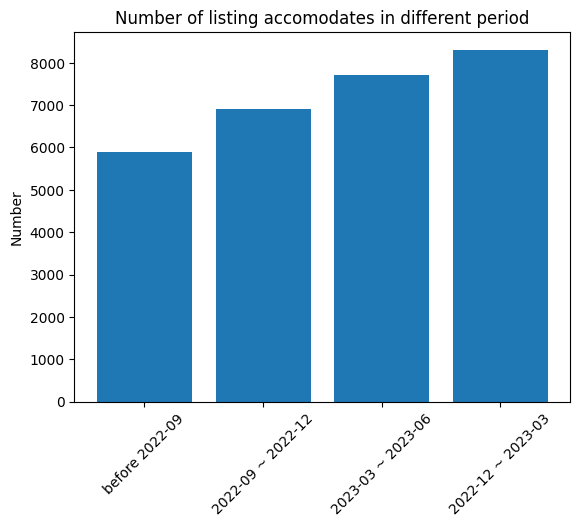

In [99]:
plt.bar(categories, cnts)
plt.xlabel('')
plt.ylabel('Number')
plt.title('Number of listing accomodates in different period')
plt.xticks(rotation=45)  #